<a href="https://colab.research.google.com/github/KIRAN-MK-211/NationalAnthemsClustering/blob/main/NationalAnthems_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link for dataset:  https://www.kaggle.com/datasets/wricheekadhikari/nation-anthems-with-lyrics

Applied KMeans Clustering with 7 clusters.

Similar words are visualised with worclouds

In [84]:
import pandas as pd
import numpy as np
import nltk
from google.colab import drive
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
drive.mount('/gdrive')

In [86]:
def preprocess(anthem):
  words = nltk.word_tokenize(anthem.lower())
  new_words= [word for word in words if word.isalnum()]
  WordSet = []
  for word in new_words:
    if word not in set(stopwords.words("english")):
        WordSet.append(word)
  ps = PorterStemmer()
  WordSetStem = []
  for word in WordSet:
    WordSetStem.append(ps.stem(word))
  lm= WordNetLemmatizer()
  WordSetLem = []
  for word in WordSetStem:
    WordSetLem.append(lm.lemmatize(word))
  return WordSetLem

In [87]:
df = pd.read_csv('datasets/NationalAnthems.csv')

In [88]:
df.head()

,id,nation,url,lyrics_englishtransliteration,lyrics_english,image,Unnamed: 6
0,1,abkhazia,https://youtu.be/1F-YWu-ucB8,"Šwnejbac, šwnejbac,\nApsuaa ryč̣ḳwyncwa.\nApsn...","March on, march on,\nsons of Abkhazia!\nShed o...",iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAA...,NaN
1,2,Afghanistan,https://youtu.be/z_eiu2cOIRk,"Dā watan Afghānistān day, dā izat də har Afghā...","This land is Afghanistan, it is the pride of e...",/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAYEBAQFBAYFBQ...,NaN
2,3,Albania,https://youtu.be/STtkicwuzlQ,Rreth flamurit të përbashkuar Me një dëshir' e...,"Around our flag we stand united,\nWith one wis...",NaN,iVBORw0KGgoAAAANSUhEUgAAAIwAAABkCAIAAADbtU+GAA...
3,4,Algeria,https://youtu.be/7fRAwtLL5Jw,Qasaman binnazilat ilmahiqat Waddima' izzakiya...,"We swear by the lightning that destroys,\nBy t...",NaN,iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAIAAADrOV6nAA...
4,5,Andorra,https://youtu.be/bRGoJlPaIXA,"El gran Carlemany, mon pare, dels alarbs em de...","The great Charlemagne, my father, from the Sar...",iVBORw0KGgoAAAANSUhEUgAAAI8AAABkCAIAAAAwgvSFAA...,NaN


In [89]:
countries = df.nation
lyrics = df.lyrics_english

In [90]:
print(preprocess(lyrics[0]))

['march', 'march', 'son', 'abkhazia', 'shed', 'blood', 'abkhazia', 'son', 'abkhazia', 'shed', 'blood', 'independ', 'son', 'abkhazia', 'like', 'sun', 'sky', 'alway', 'abkhazia', 'love', 'warm', 'countless', 'heart', 'mountain', 'sea', 'put', 'men', 'conscienc', 'also', 'put', 'starri', 'sacr', 'abkhazia', 'rada', 'reyda', 'rarira', 'rada', 'rerama', 'rerasha', 'mother', 'hero', 'nart', 'born', 'sacr', 'abkhazia', 'may', 'world', 'bless', 'thousand', 'year', 'come', 'child', 'unit', 'one', 'peopl', 'brother', 'shoulder', 'shoulder', 'march', 'abkhazian', 'brother', 'march', 'transcaucasia', 'alway', 'god', 'watch', 'better', 'futur', 'march', 'abkhazian', 'sun', 'rise', 'bright', 'futur', 'love', 'forev', 'god', 'bless', 'victori', 'bright', 'futur']


In [92]:
allAnthems = []
for i in lyrics:
  anthemSet = preprocess(i)
  finalAnthem = ""
  for word in anthemSet:
    finalAnthem += word + " "
  allAnthems.append(finalAnthem)

In [94]:
len(allAnthems)

196

In [95]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(allAnthems)

In [96]:
X.shape

(196, 2193)

In [118]:
kmeans_ob = KMeans(n_clusters = 7)
kmeans_ob.fit(X)

KMeans(n_clusters=7)

In [119]:
kmeans_ob.labels_

array([2, 4, 5, 2, 4, 5, 0, 3, 2, 2, 0, 3, 2, 0, 6, 5, 1, 5, 3, 5, 1, 4,
       0, 1, 3, 0, 6, 6, 6, 4, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 6, 6, 2,
       3, 0, 0, 5, 0, 2, 1, 4, 2, 3, 5, 1, 3, 0, 4, 2, 1, 0, 4, 5, 4, 3,
       0, 0, 5, 1, 0, 2, 4, 0, 6, 3, 0, 4, 4, 2, 0, 2, 0, 0, 2, 4, 5, 1,
       1, 1, 3, 3, 1, 4, 1, 3, 1, 5, 1, 4, 1, 0, 0, 4, 1, 4, 1, 5, 6, 2,
       3, 5, 4, 1, 1, 5, 2, 1, 4, 3, 6, 0, 4, 6, 3, 5, 5, 4, 0, 1, 4, 5,
       1, 2, 2, 0, 0, 6, 2, 2, 5, 3, 5, 1, 5, 1, 0, 3, 4, 5, 1, 3, 4, 1,
       0, 2, 2, 0, 0, 3, 6, 0, 1, 2, 3, 4, 3, 6, 4, 4, 5, 1, 0, 5, 5, 3,
       3, 4, 4, 3, 1, 0, 1, 5, 4, 0, 0, 4, 1, 1, 1, 4, 2, 1, 3, 1],
      dtype=int32)

In [99]:
def getClusterWords(n, lob, names):
  clusterWords = []
  words = ""
  for cluster in lob.cluster_centers_:
    ind = np.argpartition(cluster, -1*n)[-1*n:]
    words=""
    for index in ind:
      words+= names[index]+" "
    clusterWords.append(words)
  return clusterWords

In [120]:
names = vectorizer.get_feature_names_out()
listOfWords = getClusterWords(20, kmeans_ob, names)

In [121]:
listOfWords

['king peopl peac bless long home ever thi great reign god true futur thee see free land shore may love ',
 'nation peac alway island long belov bless let world live land love may motherland ancestor happi peopl oh forev countri ',
 'soldier consecr glori abkhazia singapor fire cannon let march come die readi wit lyri free arm fatherland live new one ',
 'one flag shall great samoa prais join free liberti let thou nation freedom aris thi land thee peopl hail valiant ',
 'nation sky love serbian live defend land star honour flag die liberti freedom make god homeland republ glori namibia countri ',
 'soul free aris peac strength peopl eritrea uniti freedom heart call nation german countri land shall fatherland serv unit one ',
 'proud shine earthli pirin thee thi thrace sun ah sparkl beauti earth dear balkan mountain loveli motherland heaven next danub ']

In [108]:
def printWordCloud(text):
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [123]:
names = vectorizer.get_feature_names_out()
listOfWords = getClusterWords(50, kmeans_ob, names)

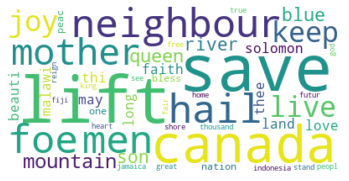

______________________________________


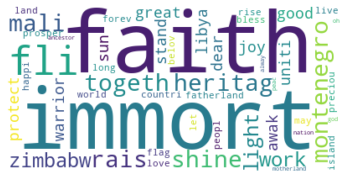

______________________________________


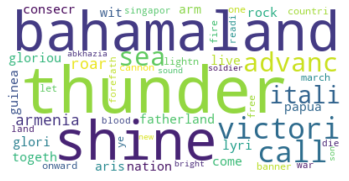

______________________________________


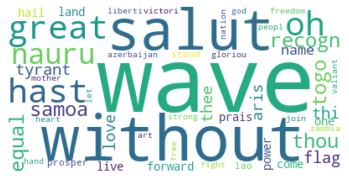

______________________________________


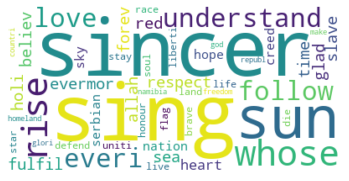

______________________________________


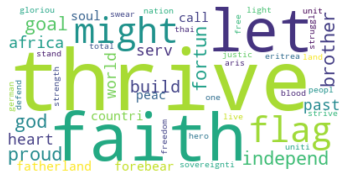

______________________________________


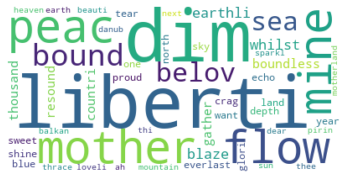

In [125]:
printWordCloud(listOfWords[0])
print("______________________________________")
printWordCloud(listOfWords[1])
print("______________________________________")
printWordCloud(listOfWords[2])
print("______________________________________")
printWordCloud(listOfWords[3])
print("______________________________________")
printWordCloud(listOfWords[4])
print("______________________________________")
printWordCloud(listOfWords[5])
print("______________________________________")
printWordCloud(listOfWords[6])

In [126]:
countries[0]

'abkhazia'

In [127]:
newClusteredCountries = {}
for i in range(len(kmeans_ob.labels_)):
  if kmeans_ob.labels_[i] not in newClusteredCountries: 
    newClusteredCountries[kmeans_ob.labels_[i]] = countries[i] + " "
  else:
    newClusteredCountries[kmeans_ob.labels_[i]] += countries[i] + " "


In [128]:
for cluster in newClusteredCountries:
  print(cluster, ":", newClusteredCountries[cluster])

2 : abkhazia Algeria Armenia Australia Bahamas China Cuba Dominican Republic El Salvador France Haiti Ireland Italy Jordan Mexico Mozambique Panama Papua New Guinea Poland Portugal Singapore Slovakia Spain Vietnam 
4 : Afghanistan Andorra Bolivia Cabo Verde Egypt Finland Georgia Ghana Honduras Iran Iraq Kazakhstan Lebanon Luxembourg Maldives Malta Monaco Namibia New Zealand North Macedonia  Pakistan San Marino Serbia Sudan Switzerland Syria Trinidad and Tobago Tunisia United Arab Emirates (UAE) Uruguay Venezuela 
5 : Albania Angola Barbados Belgium Benin Djibouti Eritrea Germany Guinea Kenya Liechtenstein Mauritania Moldova Morocco Nigeria North Korea Palau Qatar Russia Saint Kitts and Nevis Sao Tome and Principe Taiwan Thailand Timor-Leste Ukraine 
0 : Antigua and Barbuda Austria Bahrain Bosnia and Herzegovina Brunei Canada Chad Chile Costa Rica Czechia Denmark Dominica Fiji Gambia Grenada Guatemala Guyana Hungary Indonesia Israel Jamaica Japan Malawi Malaysia Netherlands Norway Parag

In [129]:
india = -1
for i in range(len(countries)):
  if countries[i] == 'India':
    india = i
    break

In [133]:
kmeans_ob.labels_[india]

3

In [132]:
pakistan = -1
for i in range(len(countries)):
  if countries[i] == 'Pakistan':
    pakistan = i
    break
kmeans_ob.labels_[pakistan]

4

In [134]:
def returnCluster(country):
  countryIndex = -1
  for i in range(len(countries)):
    if countries[i] == country:
      countryIndex = i
      break
  return kmeans_ob.labels_[countryIndex]

In [135]:
returnCluster('United States of America (USA)')

0